<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# sampling from: 'https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products'
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')

In [2]:
df.shape

(10483, 25)

In [3]:
df.head(3)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht..."


아마존 브랜드가 보이네요, 이상한 점을 찾아 보세요

In [4]:
df['brand'].value_counts()

Amazon          5977
Amazonbasics    4499
AmazonBasics       7
Name: brand, dtype: int64

대소문자를 일치시켜 보겠습니다. 카테고리가 줄겠지요?

In [5]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          5977
amazonbasics    4506
Name: brand, dtype: int64

##### 알파벳/숫자만 남겨 봅시다.

이번에는 알파벳과 숫자만 남기기 원합니다. 문장 부호나 공백문자, 다른 기호들은 대부분 노이즈라고 볼 수 있습니다 (항상 그런 것은 아닙니다). 이번에는 `re` (regular expressions, 정규식) 패키지를 사용해서 정제를 해 보겠습니다.

사용할 정규식 표현은 `'[^a-zA-Z0-9 ]'` 입니다. 이 표현은 소문자(a-z), 대문자(A-Z), 숫자(0-9), 공백문자(space)를 제외한 모든 문자를 제거합니다.

In [6]:
# 정규식 라이브러리
import re

# 정규식
# []: [] 사이 문자를 매치, ^: not
regex = r"[^a-zA-Z0-9 ]"

# 정규식을 적용할 스트링
test_str = ("(Natural Language Processing) is easy!, DS!\n")

# 치환할 문자
subst = ""

result = re.sub(regex, subst, test_str)

In [7]:
result

'Natural Language Processing is easy DS'

정규식 정의에서 치환까지 수행하는 tokenize 함수를 만들어 보세요.

In [8]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)

    # 소문자로 치환
    tokens = tokens.lower().split()
    
    return tokens

In [9]:
tokenize(test_str)

['natural', 'language', 'processing', 'is', 'easy', 'ds']



---



아마존 제품에 리뷰 데이터 다루어 보겠습니다.
Alexa, Echo와 같은 아마존 제품에 대한 리뷰를 토큰화 하고 분석해보겠습니다!
- [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [10]:
!pip install squarify

In [11]:
from collections import Counter
import re
import pandas as pd

# squarify treemap
import squarify

import matplotlib.pyplot as plt
import seaborn as sns

# # spacy: NLP library
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# # Load general-purpose pretrained models to predict named entities, part-of-speech tags and syntactic dependencies
# ## https://spacy.io/models
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [12]:
nlp = spacy.load("en_core_web_lg")

In [13]:
df.head(2).T

,0,1
Unnamed: 0,25971,19398
id,AVqkIhxunnc1JgDc3kg_,AVwjfXqqQMlgsOJE8qmm
dateAdded,2017-03-06T14:59:43Z,2017-05-20T01:34:04Z
dateUpdated,2019-02-23T02:49:38Z,2019-02-25T02:23:15Z
name,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","All-New Fire HD 8 Kids Edition Tablet, 8 HD Di..."
asins,B018T075DC,B01J94SCAM
brand,amazon,amazon
categories,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...","Fire Tablets,Tablets,Amazon Tablets,Computers ..."
primaryCategories,Electronics,Electronics
imageURLs,https://www.upccodesearch.com/images/barcode/0...,https://www.barcodable.com/images/barcode/0841...


reviews.text 문장의 단어를 카운트 해서 사용해 보겠습니다.

In [14]:
df['reviews.text'].value_counts(normalize=True)[:10]

good           0.002576
Good           0.001717
great          0.001717
Great          0.001431
ok             0.001431
Great price    0.001431
Great value    0.001240
Excellent      0.001049
great price    0.000859
good price     0.000859
Name: reviews.text, dtype: float64

각 리뷰텍스트를 토크나이즈 하여 tokens 칼럼으로 만듭니다.

In [15]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [16]:
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [17]:
df[['reviews.text', 'tokens']][:10]

,reviews.text,tokens
0,Though I have got it for cheap price during bl...,"[though, i, have, got, it, for, cheap, price, ..."
1,"I purchased the 7"" for my son when he was 1.5 ...","[i, purchased, the, 7, for, my, son, when, he,..."
2,Great price and great batteries! I will keep o...,"[great, price, and, great, batteries, i, will,..."
3,Great tablet for kids my boys love their table...,"[great, tablet, for, kids, my, boys, love, the..."
4,They lasted really little.. (some of them) I u...,"[they, lasted, really, little, some, of, them,..."
5,"I purchased 2 others for my 5 & 6yr-olds, and ...","[i, purchased, 2, others, for, my, 5, 6yrolds,..."
6,We purchased Amazon Fire kids edition tablet t...,"[we, purchased, amazon, fire, kids, edition, t..."
7,Got this when they were on sale last year and ...,"[got, this, when, they, were, on, sale, last, ..."
8,Lotta batteries. at a good price.,"[lotta, batteries, at, a, good, price]"
9,Best deal and work as expected,"[best, deal, and, work, as, expected]"


어떤 카테고리가 있는지 살펴보겠습니다

In [18]:
df['primaryCategories'].value_counts()

Electronics                    5184
Health & Beauty                4462
Toys & Games,Electronics        616
Office Supplies,Electronics     146
Electronics,Media                70
Animals & Pet Supplies            3
Electronics,Furniture             1
Office Supplies                   1
Name: primaryCategories, dtype: int64

Electronics 카테고리에 해당하는 문장들만 제한해서 분석해보겠습니다.

In [19]:

df = df[df['primaryCategories'] == 'Electronics']

In [20]:
df.head(2)

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...,"[though, i, have, got, it, for, cheap, price, ..."
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...,"[i, purchased, the, 7, for, my, son, when, he,..."




---



#### 토큰을 분석해 봅시다.

Counter를 사용하여 모든 리뷰 토큰을 카운트 해보겠습니다.

In [21]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('the', 6562),
 ('and', 5183),
 ('it', 4786),
 ('to', 4685),
 ('for', 4496),
 ('i', 4378),
 ('a', 3861),
 ('is', 3036),
 ('my', 2942),
 ('this', 2924)]

the, and, a, is... 같은 어떤 문서에든지 많이 나타나는 단어들은 사실 큰 의미를 찾기 어려운 단어들 입니다.

이런 단어들을 **stopword(불용어)** 라고 합니다.

이와같은 프로세스를 사용해서 코퍼스의 전체 워드 카운트, 랭크 등 정보가 담긴 데이터프레임을 리턴하는 함수를 만들어 봅시다. 이 함수는 토큰화된 문서들이 들어있는 코퍼스를 입력으로 받습니다.

In [22]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [23]:
wc = word_count(df['tokens'])

In [24]:
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
68,the,2951,6562,1.0,0.041588,0.041588,0.569252
16,and,3162,5183,2.0,0.032848,0.074436,0.609954
24,it,2719,4786,3.0,0.030332,0.104768,0.524498
101,to,2647,4685,4.0,0.029692,0.134461,0.510610
2,for,2952,4496,5.0,0.028494,0.162955,0.569444


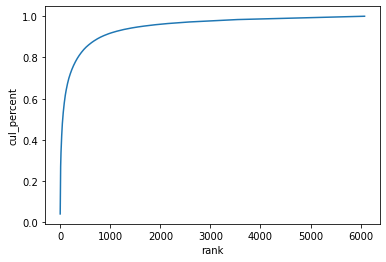

In [25]:
    import seaborn as sns

    # 누적분포그래프(CDF)
    sns.lineplot(x='rank', y='cul_percent', data=wc);

In [26]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.917869772983658

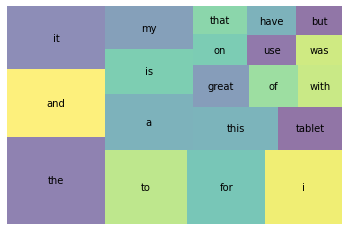

In [27]:
import squarify
import matplotlib.pyplot as plt

color=['viridis']

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()